In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [ ]:
car = pd.read_csv('/content/quikr_car.csv')

In [ ]:
car.shape

(892, 6)

In [ ]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [ ]:
car.isnull().sum()

,0
name,0
company,0
year,0
Price,0
kms_driven,52
fuel_type,55


####Creating backup copy

In [ ]:
backup=car.copy()

#Cleaning Data
**year has many non-year values**

In [ ]:
car['year'].shape#892 rows hai year column ka

(892,)

In [ ]:
car = car[car['year'].str.isnumeric()]

**year is in object. Change to integer**

In [ ]:
car['year']=car['year'].astype(int)

<ipython-input-10-c95edc1f455b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['year']=car['year'].astype(int)


In [ ]:
car['year'].shape

(842,)

**Price has Ask for Price**

In [ ]:
car['Price'].shape

(842,)

In [ ]:
car = car[car['Price']!='Ask For Price']

**Price has commas in its prices and is in object**

In [ ]:
car['Price'] = car['Price'].str.replace(',','').astype(int) # remove commas and then convert to int

In [ ]:
car['Price'].shape

(819,)

**kms_driven has object values with kms at last.**

In [ ]:
car['kms_driven'].shape

(819,)

In [ ]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

**It has nan values and two rows have 'Petrol' in them**

In [ ]:
car=car[car['kms_driven'].str.isnumeric()]

In [ ]:
car['kms_driven']=car['kms_driven'].astype(int)

In [ ]:
car['kms_driven'].shape

(817,)

**fuel_type has nan values**

In [ ]:
car['fuel_type'].shape

(817,)

In [ ]:
car=car[~car['fuel_type'].isna()]

In [ ]:
car['fuel_type'].shape

(816,)

In [ ]:
car.shape

(816, 6)

In [ ]:
car.duplicated().sum()

92

In [ ]:
car.drop_duplicates(inplace=True)

In [ ]:
car.duplicated().sum()

0

In [ ]:
car.shape

(724, 6)

In [ ]:
car.isnull().sum()

,0
name,0
company,0
year,0
Price,0
kms_driven,0
fuel_type,0


###name and company had spammed data...but with the previous cleaning, those rows got removed.

Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [ ]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

**Resetting the index of the final cleaned data**

In [ ]:
car=car.reset_index(drop=True)

#Cleaned Data

In [ ]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
719,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
720,Tata Indica V2,Tata,2009,110000,30000,Diesel
721,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
722,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [ ]:
car.to_csv('Cleaned_Car_data.csv')

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        724 non-null    object
 1   company     724 non-null    object
 2   year        724 non-null    int64 
 3   Price       724 non-null    int64 
 4   kms_driven  724 non-null    int64 
 5   fuel_type   724 non-null    object
dtypes: int64(3), object(3)
memory usage: 34.1+ KB


In [ ]:
car.shape

(724, 6)

In [ ]:
car.describe()

,year,Price,kms_driven
count,724.000000,7.240000e+02,724.000000
mean,2012.321823,4.032451e+05,46791.342541
std,4.122940,4.802936e+05,34575.416435
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.650000e+05,27000.000000
50%,2013.000000,2.900000e+05,42000.000000
75%,2015.000000,4.899990e+05,59000.000000
max,2019.000000,8.500003e+06,400000.000000


In [ ]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,724,724,724.000000,7.240000e+02,724.000000,724
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,46,202,NaN,NaN,NaN,390
mean,NaN,NaN,2012.321823,4.032451e+05,46791.342541,NaN
std,NaN,NaN,4.122940,4.802936e+05,34575.416435,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.650000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.900000e+05,42000.000000,NaN
75%,NaN,NaN,2015.000000,4.899990e+05,59000.000000,NaN


In [ ]:
car=car[car['Price']<6000000]

**Checking relationship of Company with Price**

In [ ]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

<ipython-input-40-1f2edadbed98>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


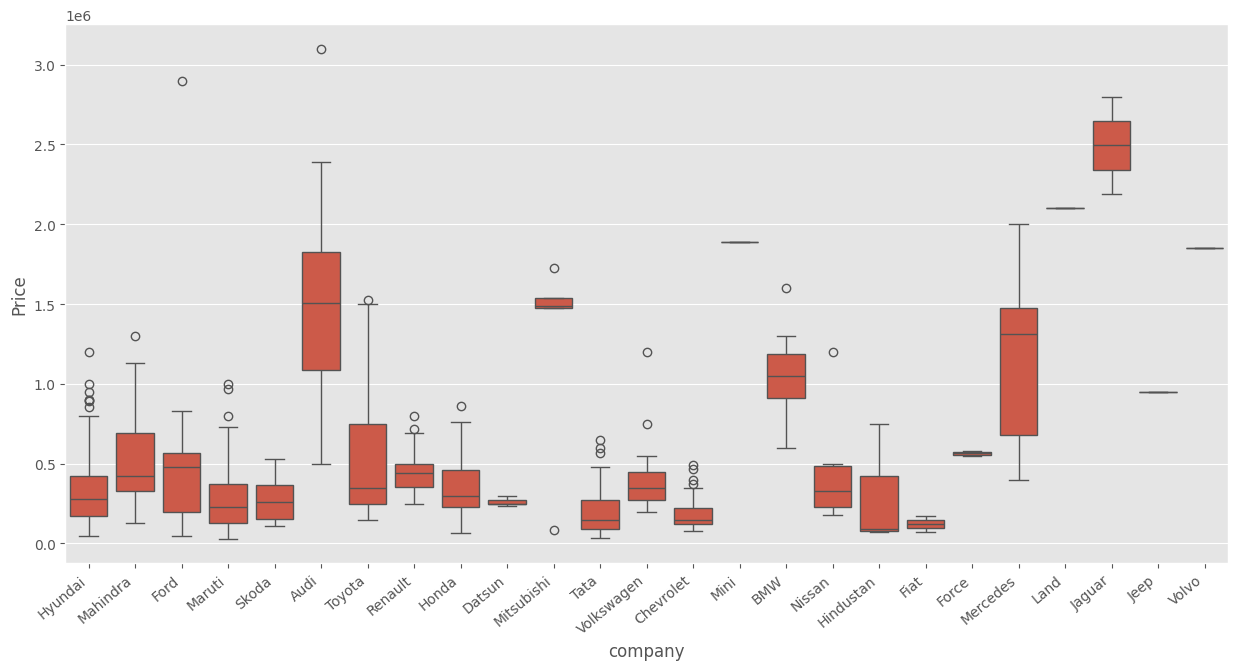

In [ ]:
import seaborn as sns
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

**Checking relationship of Year with Price**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-41-cf5aa8fae272>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the mar

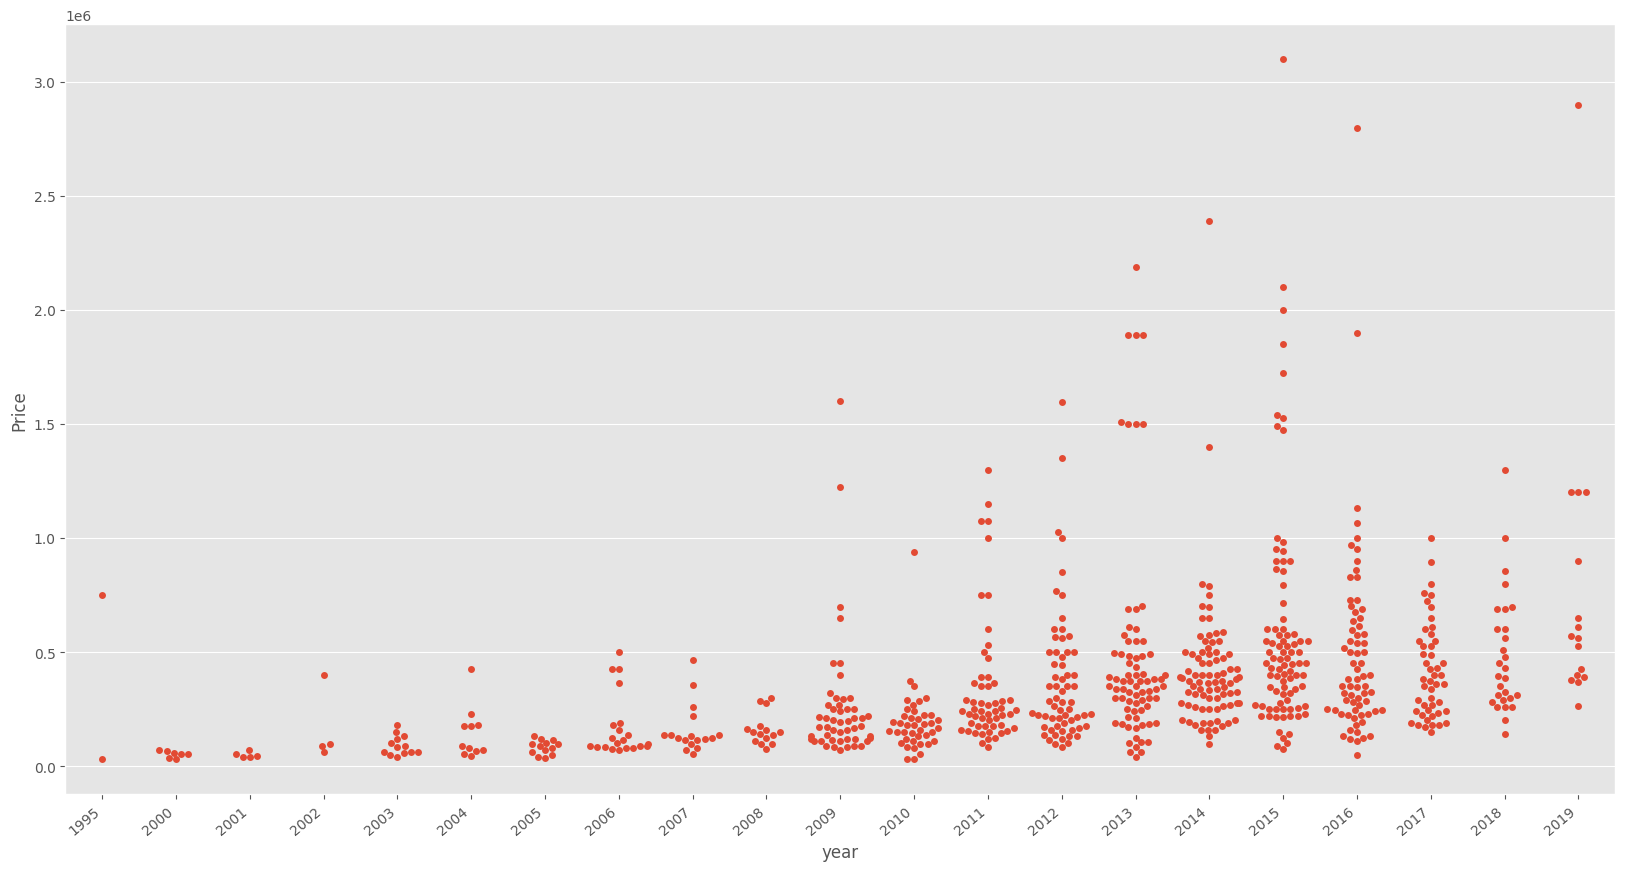

In [ ]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

**Checking relationship of kms_driven with Price**

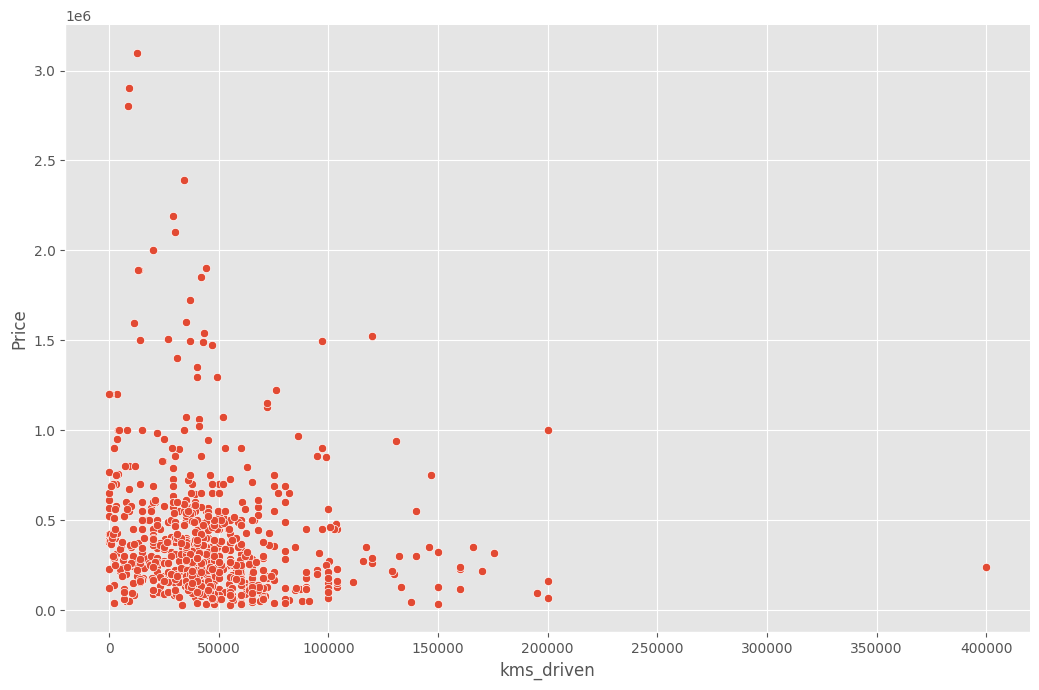

In [ ]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

**Checking relationship of Fuel Type with Price**

<Axes: xlabel='fuel_type', ylabel='Price'>

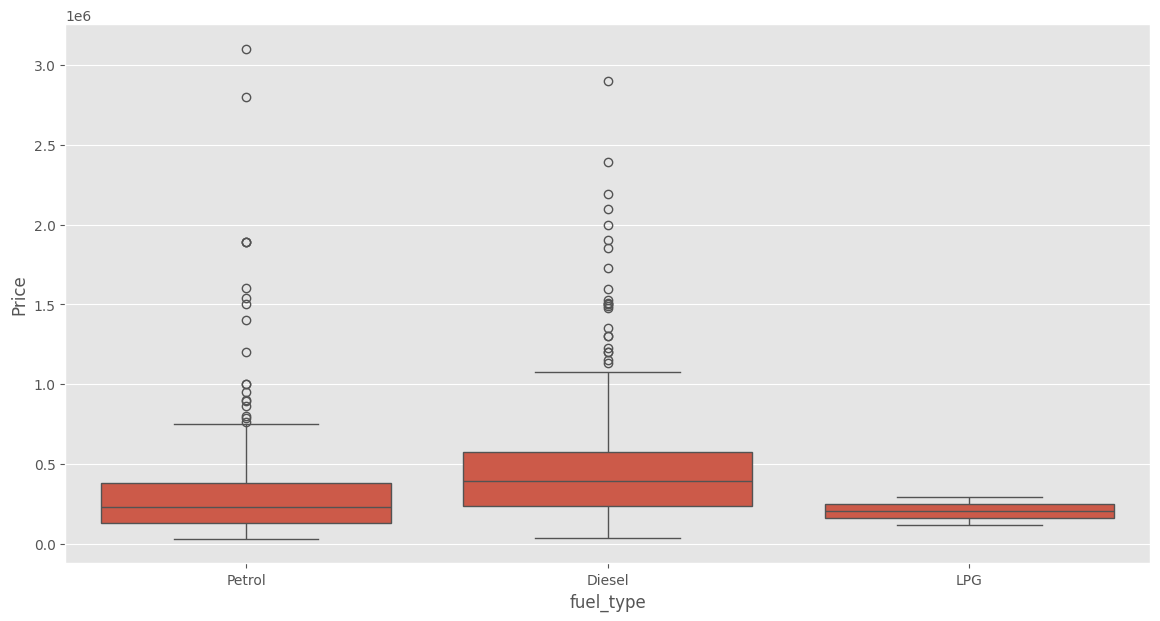

In [ ]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

**Relationship of Price with FuelType, Year and Company mixed**

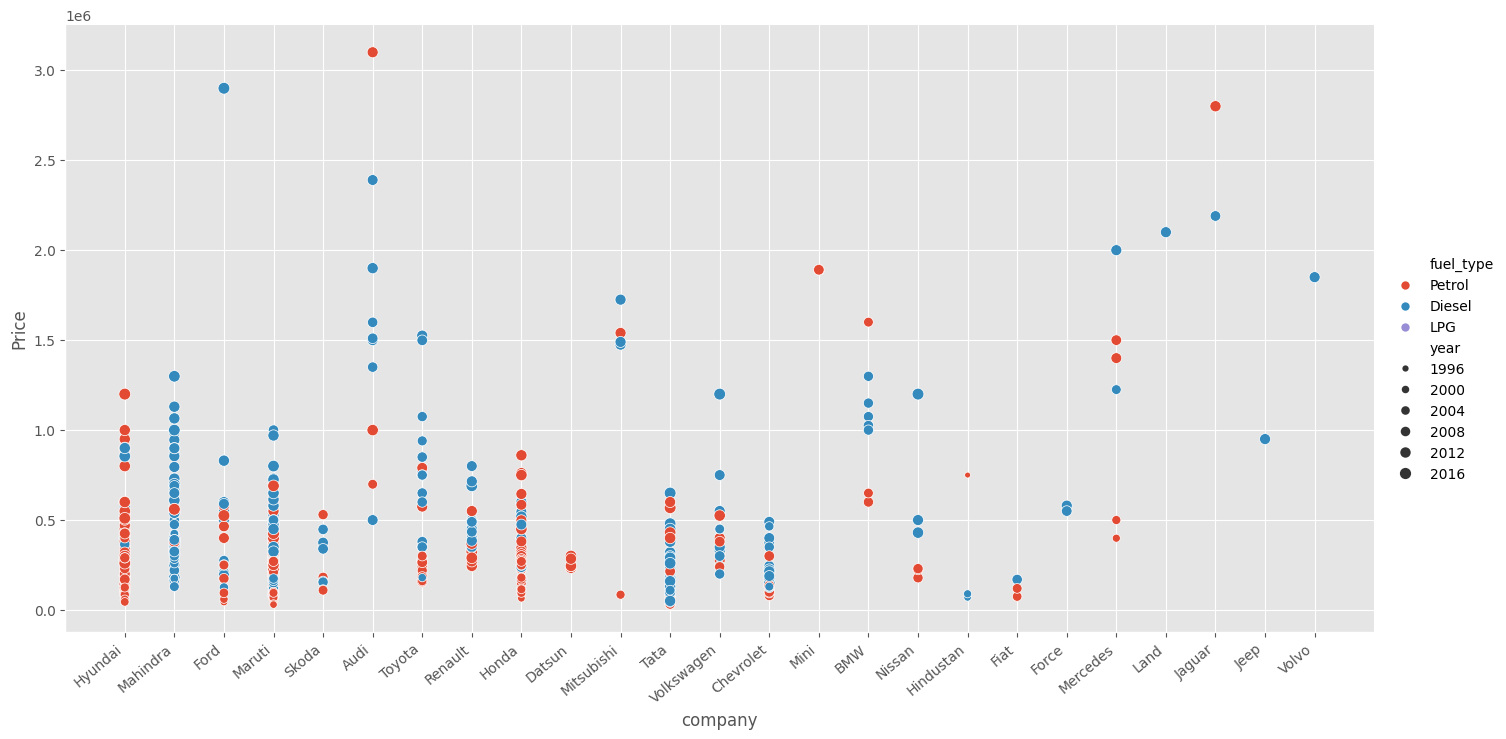

In [ ]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

**Extracting Training Data**

In [ ]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [ ]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
719,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
720,Tata Indica V2,Tata,2009,30000,Diesel
721,Toyota Corolla Altis,Toyota,2009,132000,Petrol
722,Tata Zest XM,Tata,2018,27000,Diesel


In [ ]:
y

,Price
0,80000
1,425000
2,325000
3,575000
4,175000
...,...
719,270000
720,110000
721,300000
722,260000


**Applying Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((578, 5), (145, 5), (578,), (145,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

**Creating an OneHotEncoder object to contain all the possible categories**

In [ ]:
ohe = OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore')
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

**Creating a column transformer to transform categorical columns**

In [ ]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

**Linear Regression Model**

In [ ]:
lr=LinearRegression()

**Making a pipeline**

In [ ]:
pipe=make_pipeline(column_trans,lr)

**Fitting the model**

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred=pipe.predict(X_test)

**Checking R2 Score**

In [ ]:
r2_score(y_test,y_pred)

0.5313874480830519

**Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score**

In [ ]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [ ]:
np.argmax(scores)

847

In [ ]:
scores[np.argmax(scores)]

0.8954668624603382

In [ ]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([455771.24933759])

**The best model is found at a certain random state**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8954668624603382

In [ ]:
import pickle
pickle.dump(pipe,open('LinearRegression.pkl','wb'))

In [ ]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([449933.24356301])

In [ ]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese

In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.6 MB/s eta 0:00:00


In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.106.195.174


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.195.174:8501

Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) y
your url is: https://loose-ads-swim.loca.lt
  Stopping...
^C
